# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_cals = pd.read_csv('/datasets/megaline_calls.csv')
df_int = pd.read_csv('/datasets/megaline_internet.csv')
df_mess = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_usrs = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print('Data frame megaline_plans')
df_plans.info()

Data frame megaline_plans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
#df_plans = pd.read_csv('/datasets/megaline_plans.csv')
print()
print('Pequeña muestra de megaline_plans.')

print(df_plans.head())


Pequeña muestra de megaline_plans.
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Megaline plans. Las columnas están correctos en sus valores int, float y obj. Ninguna necesita un cambio.

## Corregir datos

No se observaron correcciones de datos.

## Enriquecer los datos

In [5]:
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included']/1024

In [6]:
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


No se observaron puntos de enriquecimiento los datos.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print('info megaline_messages.')
df_usrs.info()

info megaline_messages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
#Se revisa que no existan duplicados
print('Número de filas duplicadas (usuarios): ', df_usrs.duplicated().sum())


Número de filas duplicadas (usuarios):  0


In [9]:
# Imprime una muestra de datos para usuarios
#df_usrs = pd.read_csv('/datasets/megaline_users.csv')
print('Pequeña muestra de megaline_messages.')
print(df_usrs.sample(5))
df_usrs.describe()


Pequeña muestra de megaline_messages.
     user_id first_name last_name  age  \
85      1085    Ignacio   Bennett   48   
419     1419      Bryon    Gordon   45   
173     1173    Tristan      Cain   27   
318     1318       Huey     Walsh   54   
430     1430      Myung      Pugh   63   

                                          city    reg_date      plan  \
85       Atlanta-Sandy Springs-Roswell, GA MSA  2018-07-19  ultimate   
419              Phoenix-Mesa-Chandler, AZ MSA  2018-03-29      surf   
173       Oxnard-Thousand Oaks-Ventura, CA MSA  2018-09-28      surf   
318      Atlanta-Sandy Springs-Roswell, GA MSA  2018-09-29      surf   
430  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-12-07      surf   

    churn_date  
85         NaN  
419        NaN  
173        NaN  
318        NaN  
430        NaN  


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Megaline users. La columna "user_id" tiene el id de los usuarios en formato int, se podría pasar a obj. Ya observamos que todas las columnas "user_id" se encuentran en formato int. 
Las columnas "first_name", "last_name", "age", "city", "plan", no necesitan cambio de formato. 
La columna "reg_date" está en formato obj y debe ser pasado a formato dtype datetime64. día/mes/año.
La columna "churn_date" está en formato obj y debe ser pasado a formato dtype datetime64. Este valor es la fecha en la que el usuario dejó de usar el servicio, en el valor ausente, la tarifa se estaba usando cuando fue extraída en esta base de datos, esto quiere decir, que el usuario sigue usando el servicio hasta la fecha actual. "27/04/2025".  

Con la revisión del número de filas duplicadas podemos descartar que usuarios estén multiplicados.
Y con el método describe, podemos observar que las edades de los usuarios van desde 18 años hasta 75 años. Además que la edad promedio de los usuarios es aproximadamente 45 años. Y que la antiguedad de los usuarios de la mayoría de los datos (más del 75%) está entre 2638 a 2828 días. 

### Corregir los datos

In [10]:
print('')
#En primer lugar se convierte la columna 'user_id' de int a str.
df_usrs['user_id'] = df_usrs['user_id'].astype('str')
#En segundo lugar, se convierten las columnas 'churn_date' y 'reg_date' al formato datetime64.
df_usrs['churn_date'] = pd.to_datetime(df_usrs['churn_date'], format= '%Y-%m-%d')
df_usrs['reg_date'] = pd.to_datetime(df_usrs['reg_date'], format = '%Y-%m-%d')
print('')
#En tercer lugar, se gestiona los valores NA por la fecha '2025-12-31' para que se entienda que la persona tiene todavía el servicio.
df_usrs['churn_date'] = df_usrs['churn_date'].fillna(pd.Timestamp('2025-12-31'))
print('')
df_usrs.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [11]:
#En primer lugar, agregar una columna que indique si sigue activo o no, el usuario.
df_usrs['status'] = df_usrs['churn_date'] == '2025-12-31'
df_usrs.info()
#En segundo lugar, agregar una columna que indique la cantidad de tiempo ha pasado desde su última actividad.
df_usrs['antiguedad'] = df_usrs['churn_date'] - df_usrs['reg_date']
print(df_usrs['antiguedad'].sample(10))
df_usrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
 8   status      500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(5)
memory usage: 31.9+ KB
444   2751 days
385   2903 days
167   2826 days
391   2668 days
467    291 days
114   2720 days
362   2904 days
428   2626 days
207   2566 days
7     2730 days
Name: antiguedad, dtype: timedelta64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (to

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print('Información de megaline_calls.')
df_cals.info()

Información de megaline_calls.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
print('Pequeña muestra de megaline_calls.')
print(df_cals.sample(5))
#df_cals.info()

Pequeña muestra de megaline_calls.
             id  user_id   call_date  duration
18906  1072_328     1072  2018-08-09      5.12
95196  1337_122     1337  2018-12-09     14.28
44182  1160_198     1160  2018-10-29      0.00
30648  1114_592     1114  2018-09-20     11.22
47737  1172_328     1172  2018-10-31      3.31


In [14]:
#Se revisa que no existan duplicados
print('Número de filas duplicadas (llamadas): ', df_cals.duplicated().sum())

Número de filas duplicadas (llamadas):  0


In [80]:
df_cals.describe()

,duration,month,year
count,110901.000000,110901.000000,110901.0
mean,8.875907,9.319231,2018.0
std,5.355181,2.415025,0.0
min,1.000000,1.000000,2018.0
25%,5.000000,8.000000,2018.0
50%,8.000000,10.000000,2018.0
75%,12.000000,11.000000,2018.0
max,38.000000,12.000000,2018.0


 Megaline calls
 La columna "call_date" está en dtype obj y al ser una fecha se debe de pasar a dtype 'datetime64'.
 La columna "id" está correcto presenta no inconvenientes mantenerlo en formato obj.
 El "user_id" está en dtype int podría cambiarse a obj sin problema pues no se realizarán operaciones aritméticas con este valor, o mantenerse en int si el análisis con las otras tablas es del mismo formato (Con el fin de no realizar tanta conversión).
 La columna "duration" como dtype float presenta no inconvenientes ya que se sumarán las duraciones por mes y se calculará después el importe extra.
 
Considerando que el formato está en float y la condición de megaline de redondear los valores hacia arriba, en el minuto 100.01 ya representará el minuto 101.

Al revisar los valores duplicados, podemos descartar que existan filas duplicadas de los usuarios que dupliquen resultados. Al revisar el dataframe con el método describe se detectan valores 0 en duration, los cuales podrían segmentarse para analizar si representan una llamada de 1 minuto, o tienen una razón diferente de existir.

Al tener valores de duration 0 reemplazaría ese valor por NaN y analizaría si tiene algún patrón relevante, sino, los eliminaría.

In [16]:
df_cals['duration'] = df_cals['duration'].replace(0, np.nan)

In [17]:
print(df_cals[df_cals['duration'].isna()])

              id  user_id   call_date  duration
19        1001_4     1001  2018-12-05       NaN
25       1001_13     1001  2018-12-24       NaN
31       1001_30     1001  2018-10-17       NaN
32       1001_31     1001  2018-11-03       NaN
34       1001_35     1001  2018-12-21       NaN
...          ...      ...         ...       ...
137714  1499_183     1499  2018-11-10       NaN
137715  1499_184     1499  2018-09-15       NaN
137720  1499_189     1499  2018-12-27       NaN
137722  1499_191     1499  2018-12-24       NaN
137725  1499_194     1499  2018-10-31       NaN

[26834 rows x 4 columns]


In [18]:
print(df_cals[(df_cals['user_id'] == '1001') & (pd.isna(df_cals['duration']))] )

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


Para el presente análisis se omitirán estos valores NaN, puesto que nos podría proporcionar valores distintos en los promedios. Pero es buena práctica investigar al respecto con la parte emisora de los datos para más información.

In [19]:
df_cals.dropna(subset= ['duration'] , inplace = True)

In [20]:
print(df_cals[pd.isna(df_cals['duration'])])

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


### Corregir los datos

In [21]:
print('')
# En primer lugar, cambiar el valor int de 'user_id' a str.
df_cals['user_id'] = df_cals['user_id'].astype('str')
# En segundo lugar, cambiar el valor obj de 'call_date' a datetime64.
df_cals['call_date'] = pd.to_datetime(df_cals['call_date'], format ='%Y-%m-%d')

df_cals['duration'] = np.ceil(df_cals['duration'])
df_cals.info()
print(df_cals['duration'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  object        
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB
0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 110901, dtype: float64


### Enriquecer los datos

In [22]:
#En primer lugar, colocar/agregar una nueva columna de mes y año para cada usuario.
df_cals['month'] = df_cals['call_date'].dt.month
df_cals['year'] = df_cals['call_date'].dt.year
df_cals.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  object        
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  int64         
 5   year       110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.9+ MB


## Mensajes

In [23]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print('')
df_mess.info()
print('')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



In [24]:
# Imprime una muestra de datos para los mensajes
print('')
print('Pequeña muestra de megaline_messages.')
print(df_mess.sample(5))


Pequeña muestra de megaline_messages.
             id  user_id message_date
74651   1482_64     1482   2018-11-05
58218   1369_19     1369   2018-11-22
5826   1054_193     1054   2018-07-12
28016  1172_473     1172   2018-10-22
40789  1261_458     1261   2018-05-29


In [25]:
#Se revisa que no existan duplicados
print('Número de filas duplicadas (mensajes): ', df_mess.duplicated().sum())

Número de filas duplicadas (mensajes):  0


Megaline messages. La columna "id" está como obj y presenta no inconvenientes.
La columna "user_id" está con int, cambiar a obj para que concuerde con los demás "user_id" de los data frames.
La columna "message_date" está en formato obj que debería de cambiarse al formato dtype datetime64.

### Corregir los datos

In [26]:
 #En primer lugar, se cambia el formato de la columna 'user_id' de int a obj.
df_mess['user_id'] = df_mess['user_id'].astype('str')
#En segundo lugar, se cambia el formato de la columna 'message_date' de obj a datetime64.
df_mess['message_date'] = pd.to_datetime(df_mess['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [27]:
#En primer lugar, se agrega una columna con el mes y año en el que ocurrió el mensaje.
df_mess['month'] = df_mess['message_date'].dt.month
df_mess['year'] = df_mess['message_date'].dt.year
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
 4   year          76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.9+ MB


In [81]:
df_mess.describe()

,month,year
count,76051.000000,76051.0
mean,9.584016,2018.0
std,2.276392,0.0
min,1.000000,2018.0
25%,8.000000,2018.0
50%,10.000000,2018.0
75%,12.000000,2018.0
max,12.000000,2018.0


## Internet

In [28]:
# Imprime la información general/resumida sobre el DataFrame de internet
print('')
print('Pequeña muestra de megaline_internet.')
df_int.info()


Pequeña muestra de megaline_internet.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# Imprime una muestra de datos para el tráfico de internet
print('Pequeña muestra de megaline_internet.')
print(df_int.sample(5))

Pequeña muestra de megaline_internet.
              id  user_id session_date  mb_used
100300   1475_93     1475   2018-08-02     0.00
103919   1497_35     1497   2018-12-12     0.00
72249   1336_286     1336   2018-11-04   389.75
34406     1156_3     1156   2018-10-23   774.10
56988   1257_255     1257   2018-10-20   666.19


In [30]:
#Se revisa que no existan duplicados
print('Número de filas duplicadas (internet): ', df_int.duplicated().sum())

Número de filas duplicadas (internet):  0


In [82]:
df_int.describe()

,mb_used,month,year
count,91078.000000,91078.000000,91078.0
mean,422.064206,9.339160,2018.0
std,255.063501,2.399309,0.0
min,0.010000,1.000000,2018.0
25%,223.380000,8.000000,2018.0
50%,395.905000,10.000000,2018.0
75%,588.367500,11.000000,2018.0
max,1693.470000,12.000000,2018.0


Megaline internet. La columna "id" está como obj y presenta no inconvenientes. 
La columna "user_id" está como int, este podría pasarse a obj con no inconvenientes cambiando la columna "user_id" de los otros data frames.
La columna "session_date" está en formato obj y debe ser pasado a formato time dtype datatime64, con el siguiente formato día/mes/año.
La columna "mb_used" se debe de sumar por mes y por usuario, cuando sobre pase 1024 en el caso de 1025. Este se redondeará a gigabite.

Se observan valores en 0, que por este primer analisis se eliminaran.

In [32]:
df_int['mb_used'] = df_int['mb_used'].replace(0, np.nan)
df_int.dropna(subset= ['mb_used'] , inplace = True)

In [33]:
df_int.describe()

,user_id,mb_used
count,91078.000000,91078.000000
mean,1242.576923,422.064206
std,141.992374,255.063501
min,1000.000000,0.010000
25%,1122.000000,223.380000
50%,1236.000000,395.905000
75%,1367.000000,588.367500
max,1499.000000,1693.470000


### Corregir los datos

In [34]:
# En primer lugar, cambiar el valor int de 'user_id' a str.
df_int['user_id'] = df_int['user_id'].astype('str')
# En segundo lugar, cambiar el valor de obj de 'session_date' a datatime64.
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format= '%Y-%m-%d')
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  object        
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [35]:
#En primer lugar, se agrega una columna con el mes y año en el que ocurrió el mensaje.
df_int['month'] = df_int['session_date'].dt.month
df_int['year'] = df_int['session_date'].dt.year
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  object        
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   month         91078 non-null  int64         
 5   year          91078 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


## Estudiar las condiciones de las tarifas

In [36]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.info()
print('')
print(df_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes

   messages_included  mb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10          

## Agregar datos por usuario


In [37]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
print('Dataframe llamadas.')
print('')
df_cals.info()

Dataframe llamadas.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  object        
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  int64         
 5   year       110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.9+ MB


In [38]:
user_calls_num = df_cals.groupby(['user_id','month'])['id'].count()
print(user_calls_num)

user_id  month
1000     12       16
1001     8        22
         9        38
         10       47
         11       49
                  ..
1498     12       32
1499     9        35
         10       41
         11       39
         12       56
Name: id, Length: 2256, dtype: int64


In [39]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
user_calls_duration = df_cals.groupby(['user_id', 'month'])['duration'].sum()
print(user_calls_duration)

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration, Length: 2256, dtype: float64


In [40]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
print('Dataframe mensajes.')
df_mess.info()
print('')

Dataframe mensajes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
 4   year          76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.9+ MB



In [41]:
user_mss_num = df_mess.groupby(['user_id','month'])['id'].count()
print(user_mss_num)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


In [42]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
print('')
print('Dataframe internet.')
df_int.info()


Dataframe internet.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  object        
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   month         91078 non-null  int64         
 5   year          91078 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [43]:
user_int_num = df_int.groupby(['user_id','month'])['mb_used'].sum()
print(user_int_num)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


In [44]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_concat = pd.concat([user_calls_num, user_calls_duration, user_mss_num, user_int_num], axis ='columns')
df_concat.columns = ['Calls_total','Calls_total_duration','Messages_total','Internet_total']
print(df_concat)

               Calls_total  Calls_total_duration  Messages_total  \
user_id month                                                      
1000    12            16.0                 124.0            11.0   
1001    8             22.0                 182.0            30.0   
        9             38.0                 315.0            44.0   
        10            47.0                 393.0            53.0   
        11            49.0                 426.0            36.0   
...                    ...                   ...             ...   
1498    12            32.0                 339.0             NaN   
1499    9             35.0                 346.0             NaN   
        10            41.0                 385.0             NaN   
        11            39.0                 308.0             NaN   
        12            56.0                 496.0             NaN   

               Internet_total  
user_id month                  
1000    12            1901.47  
1001    8          

In [45]:
# Añade la información de la tarifa
print('')
df_usrs.info()
print('')
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   user_id     500 non-null    object         
 1   first_name  500 non-null    object         
 2   last_name   500 non-null    object         
 3   age         500 non-null    int64          
 4   city        500 non-null    object         
 5   reg_date    500 non-null    datetime64[ns] 
 6   plan        500 non-null    object         
 7   churn_date  500 non-null    datetime64[ns] 
 8   status      500 non-null    bool           
 9   antiguedad  500 non-null    timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), int64(1), object(5), timedelta64[ns](1)
memory usage: 35.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0

In [46]:
user_tarif = df_usrs.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how= 'outer')
#print(user_tarif)
print(user_tarif.columns)
print('')
user_tarif.info()
print('')
df_concat.info()

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'status', 'antiguedad', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                500 non-null    object         
 1   first_name             500 non-null    object         
 2   last_name              500 non-null    object         
 3   age                    500 non-null    int64          
 4   city                   500 non-null    object         
 5   reg_date               500 non-null    datetime64[ns] 
 6   plan                   500 non-null    object         
 7   churn_date             500 non-null   

In [47]:
#En primer lugar,resetear el index del df de df_concat
df_3 = df_concat.reset_index()
df_3.info()
print('')
print(df_3.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   object 
 1   month                 2293 non-null   int64  
 2   Calls_total           2256 non-null   float64
 3   Calls_total_duration  2256 non-null   float64
 4   Messages_total        1806 non-null   float64
 5   Internet_total        2277 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 107.6+ KB

     user_id  month  Calls_total  Calls_total_duration  Messages_total  \
1230    1259      7         21.0                 197.0            17.0   
1911    1408      4         47.0                 424.0            34.0   
690     1145      7         47.0                 350.0            78.0   
2087    1451     11         68.0                 600.0            60.0   
466     1099      6         48.0                 42

In [90]:
#En segundo lugar, gestionar los valores nulos para realizar las operaciones.
print(df_3.columns)
print('')
print(df_3[df_3['Calls_total'].isna()])
#Observamos que calls_total NaN es en efecto por falta de llamadas.
#Por asociación la columna calls_total_duration también tendrá los mismos valores NaN
#lo anterior nos permite colocar 0 en ambas columnas con valores NaN.
df_3['Calls_total'] = df_3['Calls_total'].fillna(0)
df_3['Calls_total_duration'] = df_3['Calls_total_duration'].fillna(0)

Index(['user_id', 'month', 'Calls_total', 'Calls_total_duration',
       'Messages_total', 'Internet_total'],
      dtype='object')

Empty DataFrame
Columns: [user_id, month, Calls_total, Calls_total_duration, Messages_total, Internet_total]
Index: []


In [89]:
#Para continuar con los valores NaN de las columnas 'messages_total' y 'Internet_total'
print(df_3[df_3['Messages_total'].isna()])
print('')
print(df_3[df_3['Internet_total'].isna()])
#Comprobamos que estos valores es correcto colocar 0 en ambas columnas en las celdas con valores NaN.
df_3['Messages_total'] = df_3['Messages_total'].fillna(0)
df_3['Internet_total'] = df_3['Internet_total'].fillna(0)
#Comprobamos que la información general del df este completa.
df_3.info()

Empty DataFrame
Columns: [user_id, month, Calls_total, Calls_total_duration, Messages_total, Internet_total]
Index: []

Empty DataFrame
Columns: [user_id, month, Calls_total, Calls_total_duration, Messages_total, Internet_total]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   object 
 1   month                 2293 non-null   int64  
 2   Calls_total           2293 non-null   float64
 3   Calls_total_duration  2293 non-null   float64
 4   Messages_total        2293 non-null   float64
 5   Internet_total        2293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 107.6+ KB


In [50]:
#En tercer lugar, unimos ambos df user_tarif y df_3
merge_ut = df_3.merge(user_tarif, on= 'user_id', how ='left')
print(merge_ut.sample(5))

     user_id  month  Calls_total  Calls_total_duration  Messages_total  \
426     1089     12          0.0                   0.0            27.0   
1700    1365      9        121.0                1131.0            48.0   
797     1166      9         16.0                 182.0             0.0   
891     1185     10         48.0                 439.0             0.0   
2121    1460     10         43.0                 410.0            40.0   

      Internet_total first_name  last_name  age  \
426         16597.91     Malena     Kelley   70   
1700         6785.66    Milford       Rush   19   
797         16678.22     Kaycee     Bryant   26   
891         24856.76      Loria    Freeman   47   
2121        29750.14    Winford  Underwood   46   

                                                 city  ... status antiguedad  \
426   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  ...   True  2676 days   
1700                    Grand Rapids-Kentwood, MI MSA  ...   True  2882 days   
797     

In [88]:
#hice notas en mi cuaderno para este paso.
rme = merge_ut.iloc[0]
print(rme)

user_id                                                   1000
month                                                       12
Calls_total                                               16.0
Calls_total_duration                                     124.0
Messages_total                                            11.0
Internet_total                                         1901.47
first_name                                            Anamaria
last_name                                                Bauer
age                                                         45
city                     Atlanta-Sandy Springs-Roswell, GA MSA
reg_date                                   2018-12-24 00:00:00
plan                                                  ultimate
churn_date                                 2025-12-31 00:00:00
status                                                    True
antiguedad                                  2564 days 00:00:00
messages_included                                      

In [52]:
# Calcula el ingreso mensual para cada usuario
#df_user_tarif = merge()
#print(df_user_tarif)
def ingreso_llamadas(row):
    duration = row['Calls_total_duration']
    plan =row['minutes_included']
    comision = duration - plan
    if comision < 0:
        return 0
    else:
        
        return row['usd_per_minute'] * np.ceil(comision)

def ingreso_mensaje(row):
    duration = row['Messages_total']
    plan = row['messages_included']
    comision = duration - plan
    if comision < 0:
        return 0
    else:
        return row['usd_per_message']*np.ceil(comision)

def ingreso_datos(row):
    duration = row['Internet_total']
    plan = row['mb_per_month_included']
    comision = duration - plan
    if comision < 0:
        return 0
    else:
        gb = comision/1024       
        return row['usd_per_gb']*np.ceil(gb)

merge_ut['comision_llamada'] = merge_ut.apply(ingreso_llamadas, axis = 1)
merge_ut['comision_mensaje'] = merge_ut.apply(ingreso_mensaje, axis = 1)
merge_ut['comision_datos'] = merge_ut.apply(ingreso_datos, axis= 1)
merge_ut['ingreso_total'] = merge_ut['comision_llamada'] + merge_ut['comision_mensaje'] + merge_ut['comision_datos']+merge_ut['usd_monthly_pay']

#print(merge_ut['comision_llamada'].value_counts())
print()
#print(merge_ut['comision_mensaje'].value_counts())
print()
#print(merge_ut['comision_datos'].value_counts())

In [83]:
#hice notas en mi cuaderno para este paso.
mer_com = merge_ut.iloc[0]
print(mer_com)

user_id                                                   1000
month                                                       12
Calls_total                                               16.0
Calls_total_duration                                     124.0
Messages_total                                            11.0
Internet_total                                         1901.47
first_name                                            Anamaria
last_name                                                Bauer
age                                                         45
city                     Atlanta-Sandy Springs-Roswell, GA MSA
reg_date                                   2018-12-24 00:00:00
plan                                                  ultimate
churn_date                                 2025-12-31 00:00:00
status                                                    True
antiguedad                                  2564 days 00:00:00
messages_included                                      

Del proceso de agregación de datos, se añadieron nuevas columnas 'comision_llamadas', 'comision_mensaje' y 'comision_datos' que representan los costos extra por el uso extralimitado del servicio, y el costo total por mes del usuario, que es la suma entre el costo de su plan con el del total de sus comisiones por excedencia.

## Estudia el comportamiento de usuario

### Llamadas

<Figure size 1200x600 with 0 Axes>

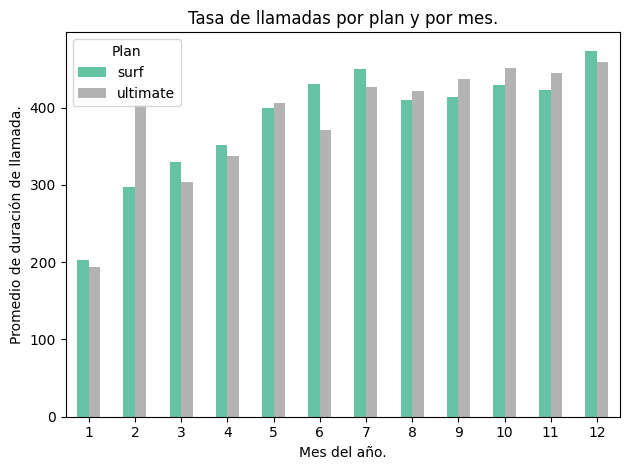

In [84]:
plt.figure(figsize = (12,6))
m_pcs = merge_ut.groupby(['month','plan_name'])['Calls_total_duration'].mean().unstack()
m_pcs.plot(kind = 'bar', colormap = 'Set2') # Set2 o usa colormap ='viridis', 'pastel1', etc.
plt.title('Tasa de llamadas por plan y por mes.')
plt.xlabel('Mes del año.')
plt.ylabel('Promedio de duración de llamada.')
plt.xticks(rotation = 0)
plt.legend(title = 'Plan')
plt.tight_layout()
plt.show()

In [112]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
td_surf = merge_ut[merge_ut['plan_name']=='surf']['Calls_total_duration']
#td_surf.replace(0, np.nan, inplace=True)
td_ultimate = merge_ut[merge_ut['plan_name']=='ultimate']['Calls_total_duration']
#td_ultimate.replace(0, np.nan, inplace=True)

In [113]:
#print(td_surf[td_surf['Calls_total_duration']== 0])
print(td_surf.sort_values())

569        0.0
930        0.0
439        0.0
933        0.0
1609       0.0
         ...  
1129    1212.0
1701    1227.0
1489    1304.0
1703    1357.0
1271    1510.0
Name: Calls_total_duration, Length: 1573, dtype: float64


In [108]:
#dfn_surf = td_surf.reset_index()
#dfn_surf.replace(0, np.nan, inplace=True)
#dfn_ultimate =td_ultimate.reset_index()
#dfn_ultimate.replace(0, np.nan, inplace=True)

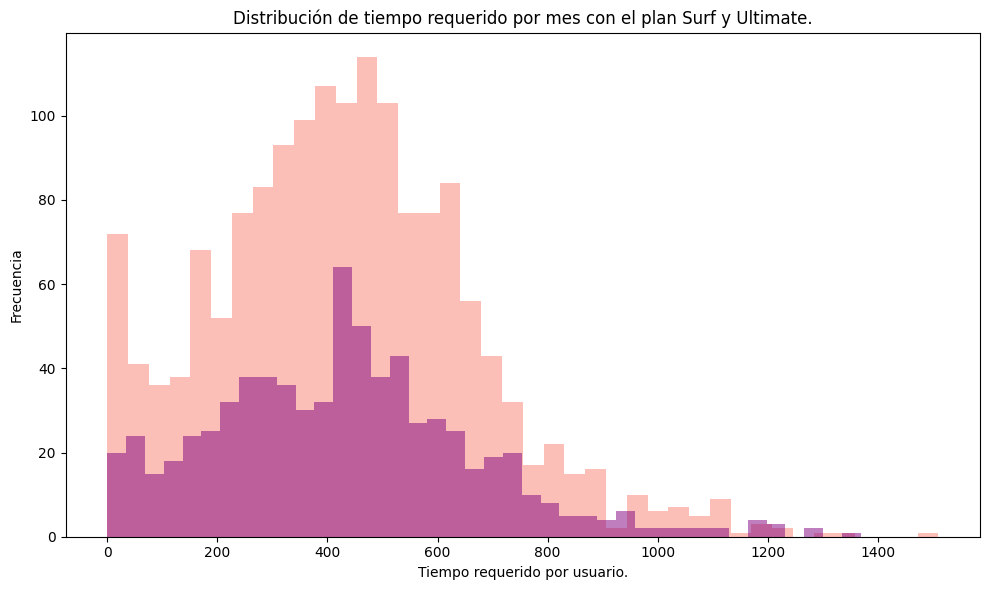

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: Calls_total_duration, dtype: float64


In [115]:
plt.figure(figsize = (10,6))
td_surf.dropna().plot(kind='hist', bins=40, color = 'salmon', alpha=0.5)
td_ultimate.dropna().plot(kind='hist', bins=40, color = 'purple', alpha=0.5)
plt.title('Distribución de tiempo requerido por mes con el plan Surf y Ultimate.')
plt.xlabel('Tiempo requerido por usuario.')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print(td_surf.describe())

In [116]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media = merge_ut['Calls_total_duration'].mean()
varianza = np.var(merge_ut['Calls_total_duration'])
print('Media de llamadas de usuarios.')
print(media)
print('Varianza de llamadas de usuarios')
print(varianza)
print()
merge_ut.describe()

Media de llamadas de usuarios.
429.2834714348016
Varianza de llamadas de usuarios
55822.82326365782



,month,Calls_total,Calls_total_duration,Messages_total,Internet_total,age,antiguedad,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,comision_llamada,comision_mensaje,comision_datos,ingreso_total
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,9.172700,48.365024,429.283471,33.166594,16764.397606,45.428260,2608 days 21:10:26.428259936,348.299171,19.709987,1284.997819,35.699956,9.058003,0.023720,0.023720,1.264828,0.144322,152.225469,189.334575
std,2.496386,26.202856,236.320077,34.070085,7967.237527,16.764349,666 days 15:10:41.615760312,441.006389,6.963259,1160.543128,23.210863,1.392652,0.009284,0.009284,3.233992,0.493515,74.675828,72.331014
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,7 days 00:00:00,50.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,20.000000
25%,8.000000,30.000000,265.000000,3.000000,12235.760000,30.000000,2701 days 00:00:00,50.000000,15.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,105.000000,150.000000
50%,10.000000,48.000000,425.000000,26.000000,16830.640000,46.000000,2785 days 00:00:00,50.000000,15.000000,500.000000,20.000000,10.000000,0.030000,0.030000,0.000000,0.000000,150.000000,190.000000
75%,11.000000,64.000000,572.000000,51.000000,20999.840000,61.000000,2865 days 00:00:00,1000.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.000000,0.000000,196.000000,230.000000
max,12.000000,167.000000,1510.000000,266.000000,70931.590000,75.000000,2921 days 00:00:00,1000.000000,30.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.300000,6.480000,700.000000,740.370000


In [118]:
media_td_surf = td_surf.mean()
varianza_td_surf = np.var(td_surf)
print('Media de llamadas de usuarios con plan Surf.')
print(media_td_surf)
print('Varianza de llamadas de usuarios con plan Surf')
print(varianza_td_surf)
print()

td_surf.describe()

Media de llamadas de usuarios con plan Surf.
428.7495232040687
Varianza de llamadas de usuarios con plan Surf
54933.334591317485



count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: Calls_total_duration, dtype: float64

In [93]:
media_td_ultimate = td_ultimate.mean()
varianza_td_ultimate = np.var(td_ultimate)
print('Media de llamadas de usuarios con plan Ultimate.')
print(media_td_ultimate)
print('Varianza de llamadas de usuarios con plan Ultimate')
print(varianza_td_ultimate)
print()
td_ultimate.describe()

Media de llamadas de usuarios con plan Ultimate.
430.45
Varianza de llamadas de usuarios con plan Ultimate
57764.12527777777



count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: Calls_total_duration, dtype: float64

Con lo anterior, podemos observar que de ambos conjuntos los usuarios tienden a variar aproximadamente entre 234 a 240 tiempo de servicio extra total.

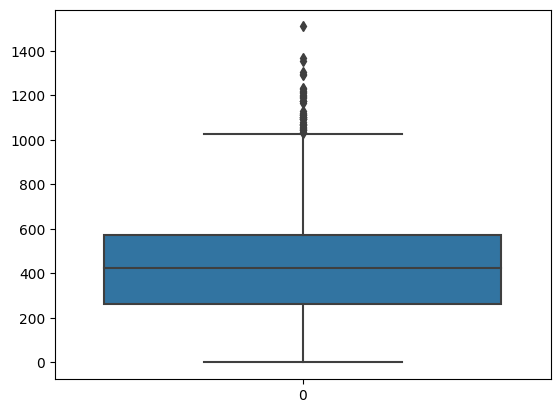

In [60]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data= merge_ut['Calls_total_duration'])
print()

<AxesSubplot:xlabel='Calls_total_duration', ylabel='plan_name'>

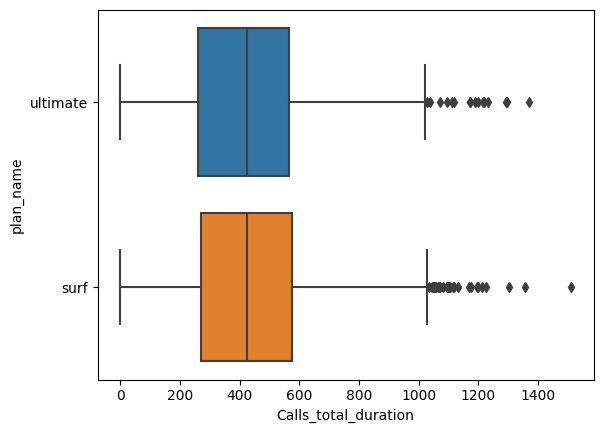

In [61]:
sns.boxplot(data=merge_ut, x = 'Calls_total_duration', y ='plan_name')
#sns.boxplot(data=merge_ut['Cals_total_duration'])
#xlabel='llamada duración.'

Distribución por plan:
Tanto el plan 'surf' como el plan 'ultimate' tiene entre sus valores de mediana 400 minutos de duración y una tendencia similar. Se observan valores atípicos en ambos planes, en el plan surf más uniformemente entre 1000 y 1200 minutos. Mientras que en el plan ultimate se encuentra entre los 1100 y 1200 minutos. Solo unos pocos usuarios del plan surf presentó un valor atípico de más de 1400 minutos. No hay variabilidad entre ambos planes, la distribución de minutos no es dispersa, y ambas gráficas de cajas están similarmente compactas.

### Mensajes

<Figure size 1200x600 with 0 Axes>

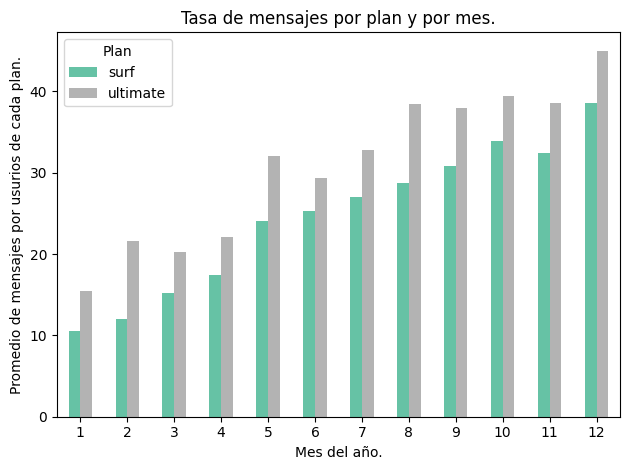

In [62]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize = (12,6))
m_pms = merge_ut.groupby(['month','plan_name'])['Messages_total'].mean().unstack()
m_pms.plot(kind = 'bar', colormap = 'Set2') # Set2 o usa colormap ='viridis', 'pastel1', etc.
plt.title('Tasa de mensajes por plan y por mes.')
plt.xlabel('Mes del año.')
plt.ylabel('Promedio de mensajes por usurios de cada plan.')
plt.xticks(rotation = 0)
plt.legend(title = 'Plan')
plt.tight_layout()
plt.show()


In [120]:
tdm_surf = merge_ut[merge_ut['plan_name']=='surf']['Messages_total']
tdm_ultimate = merge_ut[merge_ut['plan_name']=='ultimate']['Messages_total']

In [123]:
print('Estadísticas de usuarios surf')
tdm_surf.describe()

Estadísticas de usuarios surf


count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: Messages_total, dtype: float64

In [124]:
print('Estadísticas de usuarios Ultimate')
tdm_ultimate.describe()

Estadísticas de usuarios Ultimate


count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: Messages_total, dtype: float64

Las estadísticas muestran la distribución de servicios requeridos extra de los usuarios. Los valores 0 son aquellos usuarios que no requirieron servicios extras de mensajes. Por otra parte, el valor máximo es el mayor valor de mensajes extra.

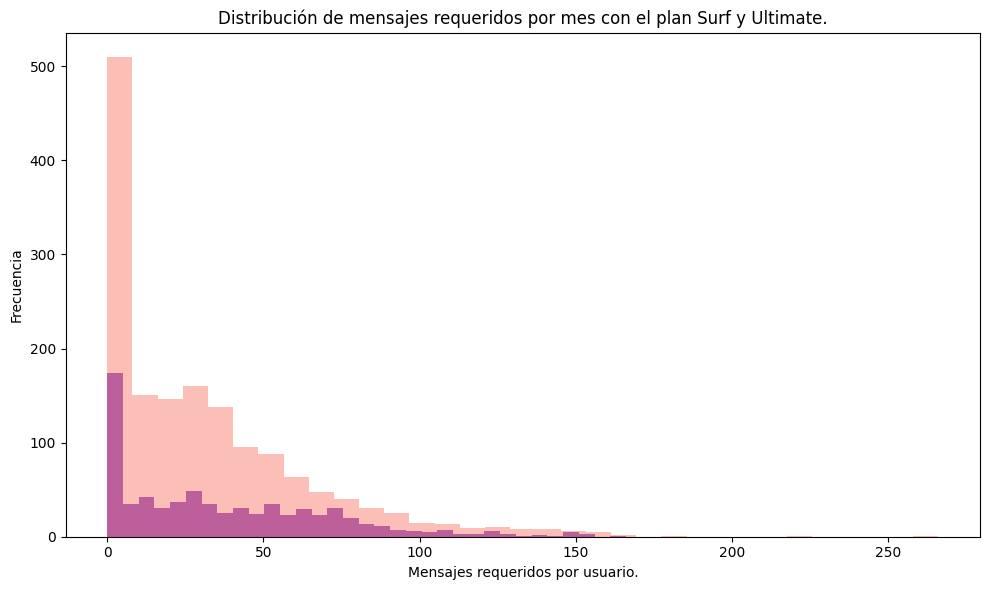

In [64]:
plt.figure(figsize = (10,6))
tdm_surf.dropna().plot(kind='hist', bins=33, color = 'salmon', alpha=0.5)
tdm_ultimate.dropna().plot(kind='hist', bins=33, color = 'purple', alpha=0.5)
plt.title('Distribución de mensajes requeridos por mes con el plan Surf y Ultimate.')
plt.xlabel('Mensajes requeridos por usuario.')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Messages_total', ylabel='plan_name'>

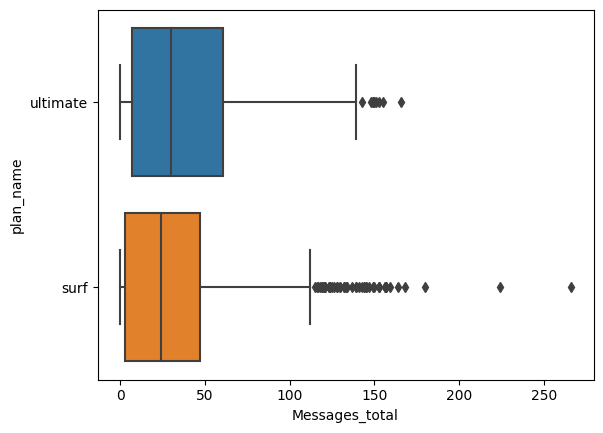

In [65]:
sns.boxplot(data=merge_ut, x = 'Messages_total', y ='plan_name')

Distribución por plan: En el histograma observamos que hay un pico en 0 25, el valor más alto está en 0 mensajes, lo que indica que muchos usuarios de ambos planes no envían mensajes.Y en el caso del pico en 25 mensajes, se ve más pronunciado en los usuarios con el plan Surf. A diferencia del mismo pico en el plan Ultimate, que es más plano a comparación. Esto sugiere que muchos clientes con el plan surf tienden a necesitar de 0 a 25 mensajes en promedio y que es menos frecuente requerir más de 25 mensajes lo cual puede coincidir con rutinas de mayor comunicación por mensajes. Y finalmente, casi ningún usuario necesita más de 100 mensajes.

Plan y mensajes: Los usuarios ultimate tenían, en promedio, mayor mensajes por mes que los del plan surf, puesto que la mediana disminuye un poco al pasar del plan surf -> plan ultimate.
Número de mensajes: En ambos planes la mediana está entre 25 a 30 mensajes. Esto podría indicar que tanto usuarios surf y ultimate siguen una tendencia de amplia variabilidad en el número de mensajes. Hay varios valores atípicos hacia más mensajes para surf, sugiere que hay usuarios que mandan muchos mensajes de 100 a 150, pero son casos poco frecuentes y extremadamente raros, usuarios que necesitaban más de 250 mensajes. Por el contrario en el plan ultimate, son extremadamente raros usuarios que requerian más de 150, lo que indica que los valores atípicos están más contenidos, con menos usuarios extremadamente activos. El plan ultimate parece atraer a usuarios más consistentes en su uso de mensajes, mientras que el plan surf capta usuarios más diversos o con necesidades más específicas e inconstantes.


### Internet

<Figure size 1200x600 with 0 Axes>

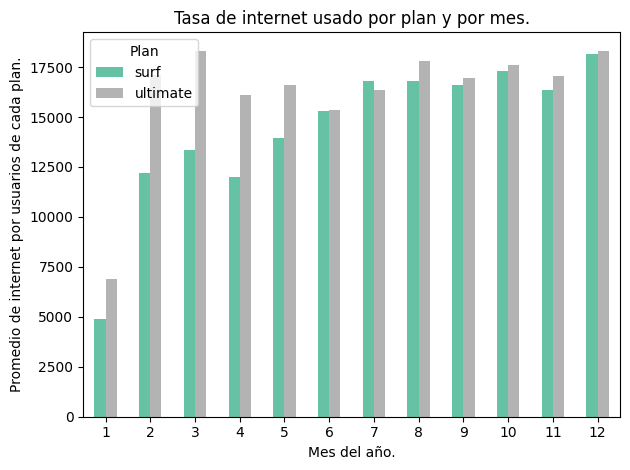

In [66]:
plt.figure(figsize = (12,6))
m_pis = merge_ut.groupby(['month','plan_name'])['Internet_total'].mean().unstack()
m_pis.plot(kind = 'bar', colormap = 'Set2') # Set2 o usa colormap ='viridis', 'pastel1', etc.
plt.title('Tasa de internet usado por plan y por mes.')
plt.xlabel('Mes del año.')
plt.ylabel('Promedio de internet por usuarios de cada plan.')
plt.xticks(rotation = 0)
plt.legend(title = 'Plan')
plt.tight_layout()
plt.show()

In [67]:
tdi_surf = merge_ut[merge_ut['plan_name']=='surf']['Internet_total']
tdi_ultimate = merge_ut[merge_ut['plan_name']=='ultimate']['Internet_total']

In [125]:
print('Estadísticas de requerimiento de internet de los usuarios del plan surf')
tdi_surf.describe()

Distribución de requerimiento de internet de los usuarios del plan surf


count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: Internet_total, dtype: float64

In [126]:
print('Estadísticas de requerimiento de internet de los usuarios del plan ultimate')
tdi_ultimate.describe()

Estadísticas de requerimiento de internet de los usuarios del plan ultimate


count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: Internet_total, dtype: float64

Las estadísticas muestran la distribución de servicios requeridos extra de los usuarios. Los valores 0 son aquellos usuarios que no requirieron servicios extras de internet. Por otra parte, el valor máximo es el mayor valor de internet extra.

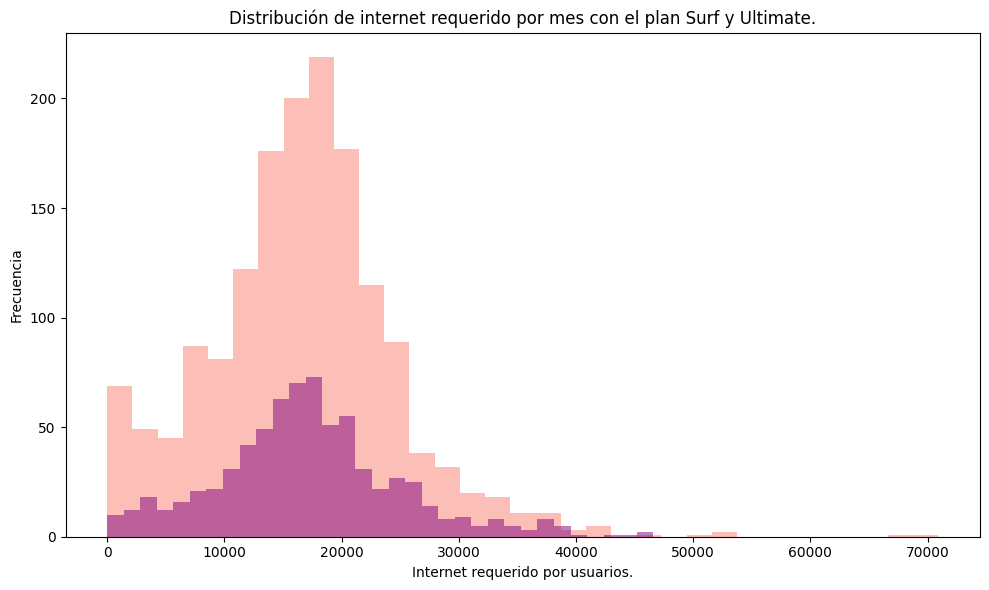

In [68]:
plt.figure(figsize = (10,6))
tdi_surf.dropna().plot(kind='hist', bins=33, color = 'salmon', alpha=0.5)
tdi_ultimate.dropna().plot(kind='hist', bins=33, color = 'purple', alpha=0.5)
plt.title('Distribución de internet requerido por mes con el plan Surf y Ultimate.')
plt.xlabel('Internet requerido por usuarios.')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Internet_total', ylabel='plan_name'>

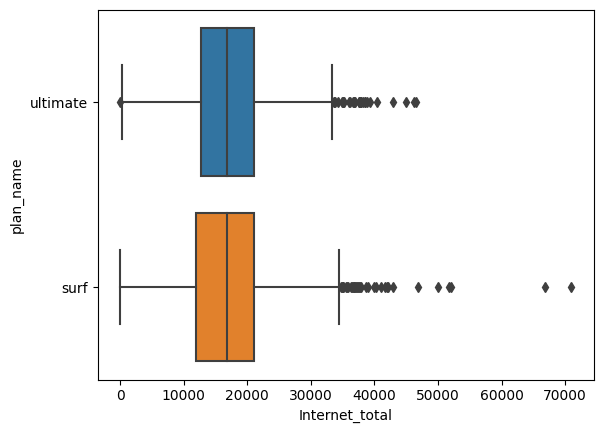

In [69]:
sns.boxplot(data=merge_ut, x = 'Internet_total', y ='plan_name')

Distribución entre planes: Ambos planes tienen un valor de mediana similar entre 16,000 MB esto lo podemos constrastar con el histograma que nos muestra que en efecto ambos comparten mediana, puesto que tiene una positiva intuimos que el valor de su media es mayor en ambos casos. Ambos planes tienen valores atípicos entre el rango 35,000 y 50,000, sin embargo, el plan surf tiene usuarios extemadamente raros que necesitan más de 70,000 MB, cosa que los usuario con el plan Ultimate no necesitan. El comportamiento de ambos grupos parece estar contenido, con una ligera excepción del plan surf, que al parecer tiene pocos usuarios dispersos.


## Ingreso

<Figure size 1200x600 with 0 Axes>

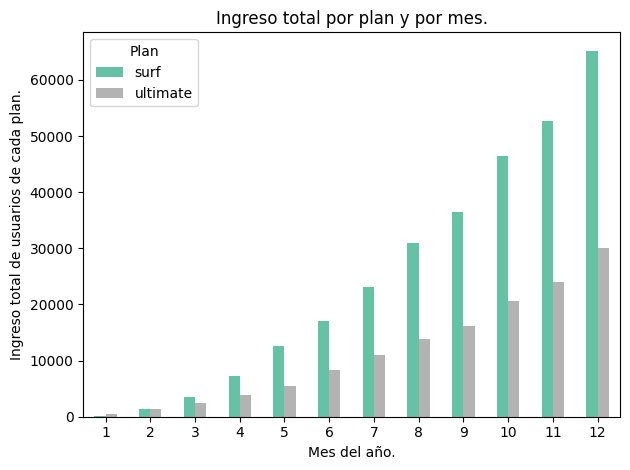

In [127]:
plt.figure(figsize = (12,6))
m_pis = merge_ut.groupby(['month','plan_name'])['ingreso_total'].sum().unstack()
m_pis.plot(kind = 'bar', colormap = 'Set2') # Set2 o usa colormap ='viridis', 'pastel1', etc.
plt.title('Ingreso total por plan y por mes.')
plt.xlabel('Mes del año.')
plt.ylabel('Ingreso total de usuarios de cada plan.')
plt.xticks(rotation = 0)
plt.legend(title = 'Plan')
plt.tight_layout()
plt.show()

In [71]:
tdig_surf = merge_ut[merge_ut['plan_name']=='surf']['ingreso_total']
tdig_ultimate = merge_ut[merge_ut['plan_name']=='ultimate']['ingreso_total']

In [129]:
print('Estadística de los ingresos totales de los usuarios de surf.')
tdig_surf.describe()

Estadística de los ingresos totales de los usuarios de surf.


count    1573.000000
mean      188.602149
std        79.401563
min        20.000000
25%       140.570000
50%       190.180000
75%       230.360000
max       740.370000
Name: ingreso_total, dtype: float64

In [130]:
print('Estadística de los ingresos totales de los usuarios de Ultimate.')
tdig_ultimate.describe()

Estadística de los ingresos totales de los usuarios de Ultimate.


count    720.000000
mean     190.934722
std       53.755977
min       70.000000
25%      161.000000
50%      189.000000
75%      217.000000
max      392.000000
Name: ingreso_total, dtype: float64

Las estadísticas muestran la distribución de servicios requeridos extra de los usuarios. Los valores mínimo en ambos planes son 20 y 70, indicando que todavía hay usuarios que no necesitaron servicios extra. Por otra parte, el valor máximo es el mayor valor de gasto que tienen los usuarios en cada paquete.

In [128]:
#print(tdig_surf)
#print()
#print(tdig_ultimate)

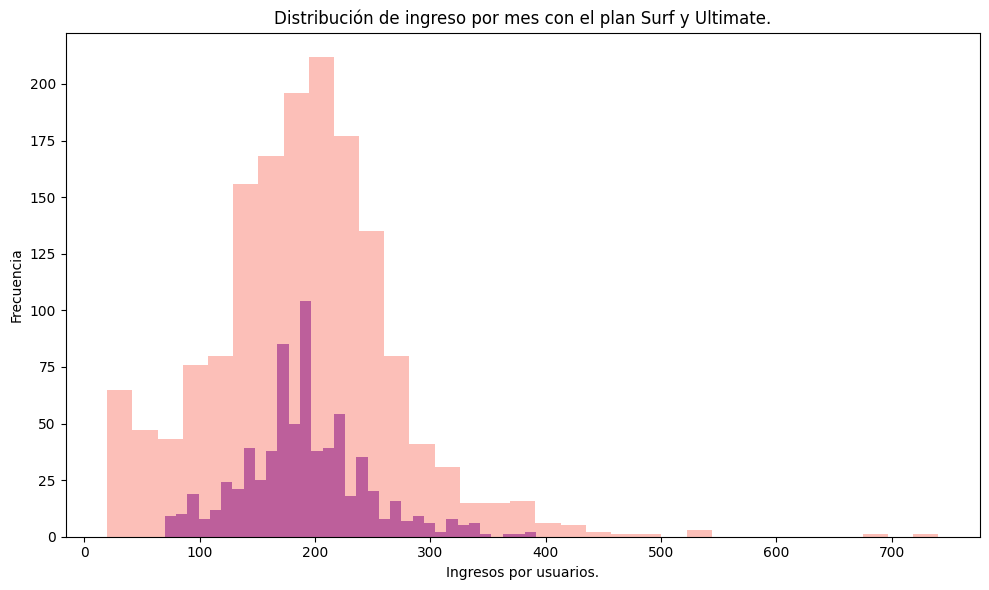

In [73]:
plt.figure(figsize = (10,6))
tdig_surf.dropna().plot(kind='hist', bins=33, color = 'salmon', alpha=0.5)
tdig_ultimate.dropna().plot(kind='hist', bins=33, color = 'purple', alpha=0.5)
plt.title('Distribución de ingreso por mes con el plan Surf y Ultimate.')
plt.xlabel('Ingresos por usuarios.')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='ingreso_total', ylabel='plan_name'>

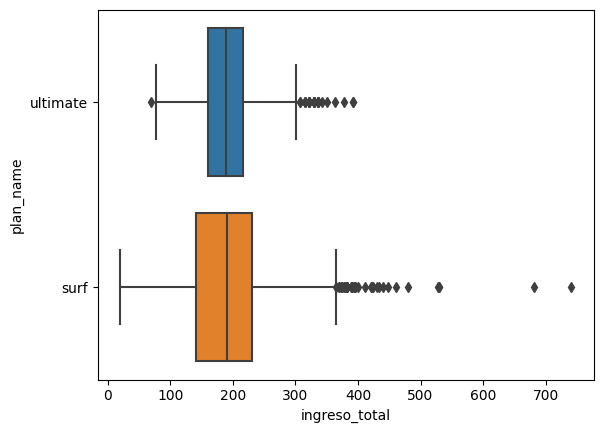

In [74]:
sns.boxplot(data=merge_ut, x = 'ingreso_total', y ='plan_name')

Conclusiones: Auque podríamos ver poco conciso el histograma este nos dice claramente que los usuarios con el plan ultimate no pagan más de su cuota mensual (70 dlls). Contrario a los usuario surf, que si bien la mediana sigue estando al rededor de 20 dlls, su media está más hacia la derecha hacia el lado positivo, además se observa que los usuarios terminan pagando inclusive más que lo que pagarían con el plan ultimate al mes, estos valores atípicos concentran usuarios que gastan de 150 hasta casi 400 dlls al mes, e incluso muy raramente, 600 dlls al mes. 

Los ingresos que se colectan de los usuarios surf es mucho mayor con creces a aquellos  usuarios con el plan ultimate, por lo anterior, el plan que se elige tiene un rol relevante para la acaparación de ingresos, y esta información respalda presupuesto para diseñar estrategías de marketing para los planes surf para adquirir más usuarios afiliados a este plan.

## Prueba las hipótesis estadísticas

 La prueba que elegimos para este enfoque es la prueba bilateral, pues vamos a evaluar ambos extremos de la distribuciones. Puesto que solo queremos saber sí los ingresos promedios procedentes de los usuarios de los diferentes planes son diferentes.

Pregunta.
¿Cambia el ingreso promedio de los planes ultimate y Surf?

Hipotesis nula: La media es igual entre ambos planes. 

Hipotesis alternativa: La media es distinta.

In [75]:
alpha = 0.05 # Nivel de significancia estadística crítica

result_prueba = st.ttest_ind(tdig_surf, tdig_ultimate)

print('valor p: ', result_prueba.pvalue)

if result_prueba.pvalue < alpha: 
    print('Rechazamos la hipótesis.')
else:
    print('No podemos rechazar la hipótesis nula')
    

valor p:  0.47367721994532186
No podemos rechazar la hipótesis nula


Según el análisis estadístico no se encontraron diferencias significativas en el ingreso promedio generado por los usuarios de los planes Ultimate y Surf. Esto sugiere que, en términos generales de ingresos, ambos planes se comportan de manera similar y podrían requerir estrategias de optimización distintas a las basadas únicamente en su valor medio de ingreso.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

La prueba que elegimos para este enfoque en la prueba bilateral,
Pues estamos evaluando grupos de usuarios de diferentes regiones.

#Pregunta.

¿Es diferente el ingreso promedio entre la región del área NY-NJ y las otras regiones?

Hipotesis nula: El ingreso promedio de area NY-NJ y las otras regiones es igual. 

Hipotesis alternativa: El ingreso promedio es distinto.

In [76]:
ciudad = 'city'
load = 'ingreso_total'

columnas_deseadas_regiones = [ciudad, load]
nuevo_regiones_ingreso = merge_ut[columnas_deseadas_regiones]
print(nuevo_regiones_ingreso)

                                           city  ingreso_total
0         Atlanta-Sandy Springs-Roswell, GA MSA          84.00
1               Seattle-Tacoma-Bellevue, WA MSA          90.00
2               Seattle-Tacoma-Bellevue, WA MSA         150.00
3               Seattle-Tacoma-Bellevue, WA MSA         240.09
4               Seattle-Tacoma-Bellevue, WA MSA         210.00
...                                         ...            ...
2288  New York-Newark-Jersey City, NY-NJ-PA MSA         250.00
2289          Orlando-Kissimmee-Sanford, FL MSA         150.00
2290          Orlando-Kissimmee-Sanford, FL MSA         220.00
2291          Orlando-Kissimmee-Sanford, FL MSA         190.00
2292          Orlando-Kissimmee-Sanford, FL MSA         240.00

[2293 rows x 2 columns]


In [77]:
region_nynj = 'New York-Newark-Jersey City, NY-NJ-PA MSA'
df_nynj = nuevo_regiones_ingreso[nuevo_regiones_ingreso['city']== region_nynj]
df_oregions = nuevo_regiones_ingreso[nuevo_regiones_ingreso['city'] != region_nynj]

In [78]:


alpha = 0.05 # Nivel de significancia estadística crítica

result_regions = st.ttest_ind(df_nynj['ingreso_total'], df_oregions['ingreso_total'])

print('valor p: ', result_regions.pvalue)

if result_regions.pvalue < alpha: 
    print('Rechazamos la hipótesis.')
else:
    print('No podemos rechazar la hipótesis nula')

valor p:  0.9526745864957589
No podemos rechazar la hipótesis nula


El análisis indica que los ingresos promedio en la región NY-NJ no difieren significativamente de las otras regiones. Por tanto, no se justifica tratar esta región de forma diferenciada en términos de ingreso promedio a partir de los datos actuales.

## Conclusión general


 A partir del análisis de llamadas, uso de internet y mensajes, identificamos la relación entre el comportamiento de los usuarios y el monto total que pagan según su plan suscrito. Los resultados muestran que los planes **‘Surf’** generan mayores ingresos totales para la empresa que los planes **‘Ultimate’**, a pesar de que estos últimos tienen una tarifa mensual más alta. Esto se debe a que el volumen de uso en planes económicos produce un ingreso más significativo, lo cual sugiere que estos planes deberían ser el foco de campañas de marketing.

Además, realizamos pruebas estadísticas para comparar los promedios de ingresos entre planes y regiones. Los resultados permiten **no rechazar la hipótesis de igualdad de medias** entre los planes, así como entre ingresos de distintas regiones. Ahunado a esto, el valor p cercano a 95% implica que no se justifica de tratar a esta región diferente en términos de ingreso promedio, lo cual representa que las campañas pueden ser homogeneas en cuestión de ingresos.